In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [4]:
housing.data[1]

array([ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,  9.71880492e-01,
        2.40100000e+03,  2.10984183e+00,  3.78600000e+01, -1.22220000e+02])

Data Set Characteristics:
Number of Instances:
20640

Number of Attributes:
8 numeric, predictive attributes and the target

Attribute Information:
MedInc median income in block
HouseAge median house age in block
AveRooms average number of rooms
AveBedrms average number of bedrooms
Population block population
AveOccup average house occupancy
Latitude house block latitude
Longitude house block longitude
Target
The target variable is the median house value in units of 100,000 for California districts.

Documentation
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#examples-using-sklearn-datasets-fetch-california-housing

In [5]:
housedata=pd.DataFrame(housing.data,columns=(['MedInc median income in block',
'HouseAge median house age in block',
'AveRooms average number of rooms',
'AveBedrms average number of bedrooms',
'Population block population',
'AveOccup average house occupancy',
'Latitude house block latitude',
'Longitude house block longitude']))

In [6]:
housedata['price']=housing.target
housedata.head(5)

,MedInc median income in block,HouseAge median house age in block,AveRooms average number of rooms,AveBedrms average number of bedrooms,Population block population,AveOccup average house occupancy,Latitude house block latitude,Longitude house block longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


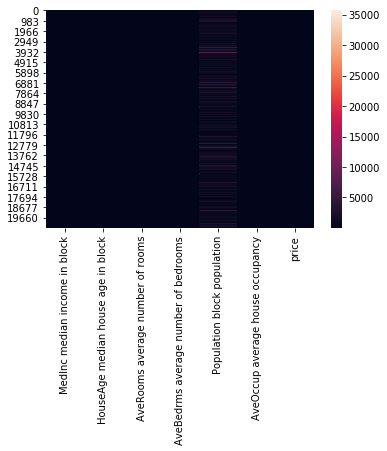

In [7]:
sns.heatmap(housedata.drop(['Latitude house block latitude','Longitude house block longitude'],axis=1))

In [8]:
housedata['HouseAge median house age in block'].mean()

28.639486434108527

In [14]:
from sklearn.model_selection import train_test_split
x_train_full,x_test,y_train_full,y_test=train_test_split(housing.data,housing.target)
x_train,x_valid,y_train,y_valid=train_test_split(x_train_full,y_train_full)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_valid=scaler.transform(x_valid)
x_test=scaler.transform(x_test)

In [20]:
np.random.seed(42)
tf.random.set_seed(42)

In [23]:
x_train.shape

(8,)

In [71]:
model = keras.models.Sequential([
    keras.layers.Dense(50, activation="relu", input_shape=[8]),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(1)
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 50)                450       
_________________________________________________________________
dense_15 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 51        
Total params: 3,051
Trainable params: 3,051
Non-trainable params: 0
_________________________________________________________________


In [72]:
model.compile(loss="mean_squared_error", 
              optimizer=keras.optimizers.SGD(lr=1e-3), 
              metrics=['mae'])

In [73]:
model_history = model.fit(x_train, y_train, epochs=50, validation_data=(x_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/50
11610/11610 [==============================] - 2s 141us/sample - loss: 2.1752 - mae: 1.0883 - val_loss: 0.9817 - val_mae: 0.7670
Epoch 2/50
11610/11610 [==============================] - 1s 98us/sample - loss: 0.8719 - mae: 0.6916 - val_loss: 0.6636 - val_mae: 0.6200
Epoch 3/50
11610/11610 [==============================] - 1s 99us/sample - loss: 0.6656 - mae: 0.6072 - val_loss: 0.6033 - val_mae: 0.5776
Epoch 4/50
11610/11610 [==============================] - 1s 100us/sample - loss: 0.6181 - mae: 0.5777 - val_loss: 0.5695 - val_mae: 0.5532
Epoch 5/50
11610/11610 [==============================] - 1s 99us/sample - loss: 0.5850 - mae: 0.5580 - val_loss: 0.5424 - val_mae: 0.5405
Epoch 6/50
11610/11610 [==============================] - 1s 98us/sample - loss: 0.5559 - mae: 0.5422 - val_loss: 0.5190 - val_mae: 0.5283
Epoch 7/50
11610/11610 [==============================] - 1s 99us/sample - loss: 0.5325 - mae: 0.5302 - val_loss: 0

In [74]:
y=model.evaluate(x_test,y_test)

5160/5160 [==============================] - 0s 53us/sample - loss: 0.3903 - mae: 0.4389


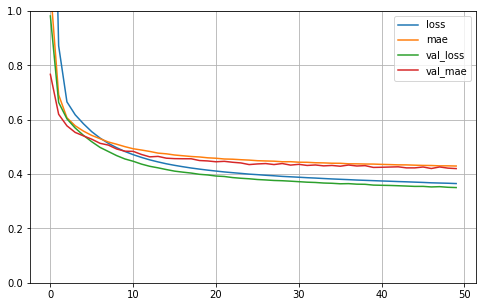

In [75]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

In [76]:
x_n=x_test[:3]
y_pred=model.predict(x_test)

In [77]:
y_pred=np.array(y_pred)

In [78]:
y_pred=np.array(y_pred).reshape(5160,)

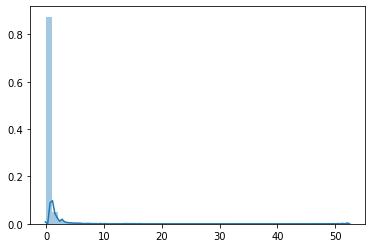

In [79]:
sns.distplot((y_test-y_pred)*(y_test-y_pred))